In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper import *
import itertools

In [2]:
from sklearn import  model_selection
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score, mean_absolute_error, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('UCI_Credit_Card.csv')
X_1, X_2, y_1, y_2 = train_test_split(df.loc[:, df.columns != 'default.payment.next.month'], 
                                      df['default.payment.next.month'], 
                                      test_size= 4000, 
                                      train_size = 6000, random_state = 42)
X_1, X_v, y_1, y_v = train_test_split(X_1,y_1, test_size=2000, random_state = 42)

d1_keep_list = df.columns[1:12]
X_1 = X_1[d1_keep_list]

d2_keep_list = df.columns[12:-1]
X_2 = X_2[d2_keep_list]

X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, train_size=0.8, random_state = 42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, train_size=0.8, random_state = 42)

In [5]:
X1_test_new = X_v.iloc[:, 1:12]
X2_test_new = X_v.iloc[:, 12:]
display(X1_test_new, X2_test_new)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
21156,280000.0,1,1,1,37,2,-1,-1,-1,-2,-1
22051,200000.0,2,2,1,28,1,-1,-1,-1,-1,-1
1347,630000.0,1,1,2,40,0,0,0,0,0,0
27678,130000.0,2,3,1,23,0,0,0,0,0,0
19829,30000.0,2,3,1,48,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2527,390000.0,1,3,1,49,1,-2,-2,-2,-2,-2
18506,50000.0,2,1,2,23,0,0,0,0,0,0
3468,100000.0,2,3,1,53,1,-2,-2,-2,-2,-2
4110,90000.0,2,2,1,29,0,0,0,0,0,0


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21156,1405.0,1549.0,1504.0,0.0,0.0,2949.0,1549.0,1504.0,0.0,0.0,2949.0,2838.0
22051,0.0,2658.0,150.0,3570.0,2853.0,0.0,2658.0,150.0,3570.0,2853.0,0.0,0.0
1347,440474.0,444370.0,455286.0,327021.0,334558.0,341439.0,18000.0,20000.0,12000.0,13000.0,13022.0,13016.0
27678,109592.0,113508.0,115633.0,96898.0,46425.0,0.0,5733.0,5659.0,4680.0,2325.0,0.0,0.0
19829,36956.0,35422.0,35714.0,32193.0,29979.0,28191.0,1553.0,3345.0,0.0,1000.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2527,0.0,0.0,0.0,0.0,0.0,5112.0,0.0,0.0,0.0,0.0,5112.0,0.0
18506,22939.0,23966.0,24939.0,23962.0,24439.0,25044.0,1413.0,1386.0,1399.0,876.0,1000.0,959.0
3468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4110,13770.0,14024.0,9232.0,4173.0,4408.0,5846.0,1522.0,3010.0,1500.0,1500.0,1500.0,2000.0


In [6]:
scaler = StandardScaler()

In [7]:
df_lst = [[X1_train, X1_test_new], [X2_train, X2_test_new]]
suffix = ['train_s', 'test_s']
df_scaled = dict()

for i in range(1, 3):
    scaler.fit(pd.concat(df_lst[i - 1], axis = 0))
    for index, j in enumerate(df_lst[i - 1]):
        df_scaled['X' + str(i) + '_' + suffix[index]] = pd.DataFrame(scaler.transform(j), 
                                                                    columns = j.columns)
df_scaled.keys()

dict_keys(['X1_train_s', 'X1_test_s', 'X2_train_s', 'X2_test_s'])

## Import models


In [8]:
import os
import pickle

In [9]:
models_dict = {}
for i in os.listdir('models/'):
    with open('models/' + i, 'rb') as model_file:
        models_dict[i.split('.')[0]] = pickle.load(model_file)

models_dict

E:\Tools\Anaconda\conda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
E:\Tools\Anaconda\conda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
E:\Tools\Anaconda\conda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
E:\Tools\Anaconda\conda\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid resul

{'ANN1': MLPClassifier(hidden_layer_sizes=(5, 5, 5, 5), learning_rate_init=0.1),
 'ANN2': MLPClassifier(activation='tanh', hidden_layer_sizes=(22,),
               learning_rate_init=10.0),
 'GB1': GradientBoostingClassifier(learning_rate=0.02, max_depth=4, max_features=0.8,
                            n_estimators=400),
 'GB2': GradientBoostingClassifier(max_features=1.0, n_estimators=320),
 'knn_1': KNeighborsClassifier(),
 'knn_2': KNeighborsClassifier(n_neighbors=1, p=1),
 'svc_1': SVC(C=10),
 'svc_2': SVC(C=10, kernel='sigmoid'),
 'tree1': DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                        min_samples_split=24),
 'tree2': DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                        min_samples_split=24)}

In [10]:
# (clf,X_train, X_test, y_train, y_test):
results = {}
for name, model in models_dict.items():
    if name[:-1] in ('GB', 'tree'):
        if name[-1] == '1':
            results[name] = final_classifier_evaluation_2(model, X1_train, X1_test_new, y1_train, y_v)
        elif name[-1] == '2':
            results[name] = final_classifier_evaluation_2(model, X2_train, X2_test_new, y2_train, y_v)
    else:
        if name[-1] == '1':
            results[name] = final_classifier_evaluation_2(model, df_scaled['X1_train_s'], df_scaled['X1_test_s'], 
                                                          y1_train, y_v)
        elif name[-1] == '2':
            results[name] = final_classifier_evaluation_2(model, df_scaled['X2_train_s'], df_scaled['X2_test_s'], 
                                                          y2_train, y_v)


In [11]:
df = pd.DataFrame.from_dict(results).T
df

,auc,f1,accuracy,precision,recall,training_time
ANN1,0.682765,0.510264,0.8330,0.625899,0.430693,0.187415
ANN2,0.495478,0.103203,0.7480,0.183544,0.071782,0.079775
GB1,0.654737,0.462783,0.8340,0.668224,0.353960,0.709814
GB2,0.576454,0.287770,0.8020,0.526316,0.198020,1.857846
knn_1,0.623297,0.397554,0.8030,0.520000,0.321782,0.006828
knn_2,0.557067,0.292804,0.7150,0.293532,0.292079,0.005641
svc_1,0.644759,0.440945,0.8225,0.606061,0.346535,0.261272
svc_2,0.534477,0.253485,0.7055,0.259740,0.247525,0.101991
tree1,0.701255,0.521315,0.8035,0.513189,0.529703,0.003082
tree2,0.634684,0.413666,0.6825,0.329897,0.554455,0.013778


In [12]:
df_new = df.reset_index()
df_new['data_source'] = np.where(df_new['index'].str.slice(-1) == '1', 'Data 1', 'Data 2')
df_new['Model'] = df_new['index'].str.slice(0, -1).str.strip('_').str.upper()
# df.set_index(['Company', 'date'], inplace=True)
df_new.drop(['index'], 1).set_index(['data_source', 'Model'])

,,auc,f1,accuracy,precision,recall,training_time
data_source,Model,,,,,,
Data 1,ANN,0.682765,0.510264,0.8330,0.625899,0.430693,0.187415
Data 2,ANN,0.495478,0.103203,0.7480,0.183544,0.071782,0.079775
Data 1,GB,0.654737,0.462783,0.8340,0.668224,0.353960,0.709814
Data 2,GB,0.576454,0.287770,0.8020,0.526316,0.198020,1.857846
Data 1,KNN,0.623297,0.397554,0.8030,0.520000,0.321782,0.006828
Data 2,KNN,0.557067,0.292804,0.7150,0.293532,0.292079,0.005641
Data 1,SVC,0.644759,0.440945,0.8225,0.606061,0.346535,0.261272
Data 2,SVC,0.534477,0.253485,0.7055,0.259740,0.247525,0.101991
Data 1,TREE,0.701255,0.521315,0.8035,0.513189,0.529703,0.003082


In [13]:
df.iloc[1::2, 0]

ANN2     0.495478
GB2      0.576454
knn_2    0.557067
svc_2    0.534477
tree2    0.634684
Name: auc, dtype: float64

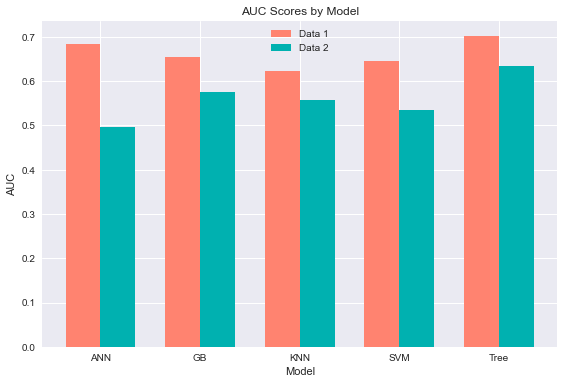

In [14]:
# data to plot
n_groups = 5

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df.iloc[::2, 0], bar_width, 
                 color='#FF8370', label='Data 1')

rects2 = plt.bar(index + bar_width, df.iloc[1::2, 0], bar_width, 
                color='#00B1B0', label='Data 2')

plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('AUC Scores by Model')
plt.xticks(index + bar_width/2, ('ANN', 'GB', 'KNN', 'SVM', 'Tree'))
plt.legend()

plt.tight_layout()
plt.show()

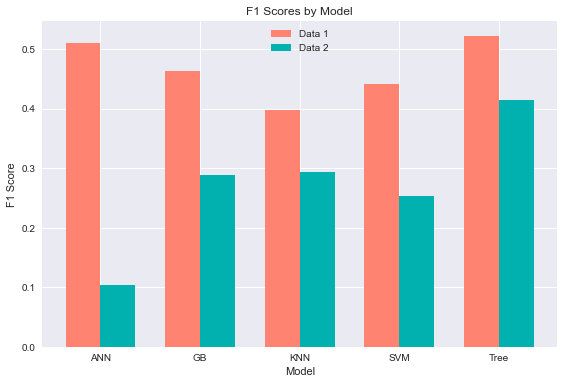

In [15]:
# data to plot
n_groups = 5

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df.iloc[::2, 1], bar_width, 
                 color='#FF8370', label='Data 1')

rects2 = plt.bar(index + bar_width, df.iloc[1::2, 1], bar_width, 
                color='#00B1B0', label='Data 2')

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores by Model')
plt.xticks(index + bar_width/2, ('ANN', 'GB', 'KNN', 'SVM', 'Tree'))
plt.legend()

plt.tight_layout()
plt.show()

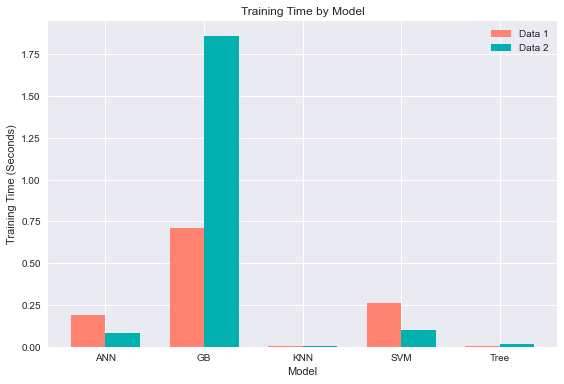

In [16]:
# data to plot
n_groups = 5

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df.iloc[::2, -1], bar_width, 
                 color='#FF8370', label='Data 1')

rects2 = plt.bar(index + bar_width, df.iloc[1::2, -1], bar_width, 
                color='#00B1B0', label='Data 2')

plt.xlabel('Model')
plt.ylabel('Training Time (Seconds)')
plt.title('Training Time by Model')
plt.xticks(index + bar_width/2, ('ANN', 'GB', 'KNN', 'SVM', 'Tree'))
plt.legend()

plt.tight_layout()
plt.show()

## Final summary

In [17]:
scaler = StandardScaler()

In [18]:
df_lst = [[X1_train, X1_test], [X2_train, X2_test]]
suffix = ['train_s', 'test_s']
df_scaled = dict()

for i in range(1, 3):
    scaler.fit(pd.concat(df_lst[i - 1], axis = 0))
    for index, j in enumerate(df_lst[i - 1]):
        df_scaled['X' + str(i) + '_' + suffix[index]] = pd.DataFrame(scaler.transform(j), 
                                                                    columns = j.columns)
df_scaled['X1_train_s']

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,-1.043445,0.823318,0.173818,0.851091,-1.459211,0.907929,1.807222,0.135797,0.200901,0.236815,0.263615
1,-0.891863,0.823318,0.173818,0.851091,-0.599096,0.012536,0.113084,0.135797,0.200901,0.236815,0.263615
2,-0.058165,0.823318,0.173818,-1.049727,0.261018,-0.882858,0.113084,0.135797,0.200901,0.236815,0.263615
3,-0.664491,0.823318,1.442560,-1.049727,0.583561,0.012536,0.113084,0.135797,0.200901,0.236815,0.263615
4,2.594511,0.823318,1.442560,-1.049727,2.733846,0.012536,0.113084,0.135797,1.944076,0.236815,0.263615
...,...,...,...,...,...,...,...,...,...,...,...
3195,-1.195026,-1.214598,0.173818,-1.049727,-0.491582,0.012536,0.113084,0.135797,1.944076,0.236815,0.263615
3196,-1.119235,0.823318,0.173818,-1.049727,0.691075,0.907929,1.807222,1.830609,1.944076,0.236815,0.263615
3197,-1.043445,-1.214598,-1.094925,0.851091,-1.029154,0.907929,-0.733985,-0.711609,-1.542274,-1.560639,-1.513065
3198,0.396579,-1.214598,0.173818,-1.049727,1.228646,-1.778251,-1.581054,-1.559015,-1.542274,-1.560639,-1.513065


In [19]:
# (clf,X_train, X_test, y_train, y_test):
results = {}
for name, model in models_dict.items():
    if name[:-1] in ('GB', 'tree'):
        if name[-1] == '1':
            results[name] = final_classifier_evaluation_2(model, X1_train, X1_test, y1_train, y1_test)
        elif name[-1] == '2':
            results[name] = final_classifier_evaluation_2(model, X2_train, X2_test, y2_train, y2_test)
    else:
        if name[-1] == '1':
            results[name] = final_classifier_evaluation_2(model, df_scaled['X1_train_s'], df_scaled['X1_test_s'], 
                                                          y1_train, y1_test)
        elif name[-1] == '2':
            results[name] = final_classifier_evaluation_2(model, df_scaled['X2_train_s'], df_scaled['X2_test_s'], 
                                                          y2_train, y2_test)

In [20]:
df = pd.DataFrame.from_dict(results).T
df

,auc,f1,accuracy,precision,recall,training_time
ANN1,0.677849,0.502959,0.79000,0.534591,0.474860,0.381467
ANN2,0.500443,0.162544,0.70375,0.230000,0.125683,0.116218
GB1,0.650163,0.459364,0.80875,0.625000,0.363128,0.727440
GB2,0.548047,0.214592,0.77125,0.500000,0.136612,1.909514
knn_1,0.614557,0.390244,0.78125,0.518519,0.312849,0.007286
knn_2,0.539460,0.289617,0.67500,0.289617,0.289617,0.006471
svc_1,0.629805,0.418773,0.79875,0.591837,0.324022,0.273592
svc_2,0.520242,0.248555,0.67500,0.263804,0.234973,0.109866
tree1,0.677323,0.498615,0.77375,0.494505,0.502793,0.003244
tree2,0.636758,0.443983,0.66500,0.357860,0.584699,0.014798


In [21]:
df_new = df.reset_index()
df_new['data_source'] = np.where(df_new['index'].str.slice(-1) == '1', 'Data 1', 'Data 2')
df_new['Model'] = df_new['index'].str.slice(0, -1).str.strip('_').str.upper()
# df.set_index(['Company', 'date'], inplace=True)
df_new.drop(['index'], 1).set_index(['data_source', 'Model'])

,,auc,f1,accuracy,precision,recall,training_time
data_source,Model,,,,,,
Data 1,ANN,0.677849,0.502959,0.79000,0.534591,0.474860,0.381467
Data 2,ANN,0.500443,0.162544,0.70375,0.230000,0.125683,0.116218
Data 1,GB,0.650163,0.459364,0.80875,0.625000,0.363128,0.727440
Data 2,GB,0.548047,0.214592,0.77125,0.500000,0.136612,1.909514
Data 1,KNN,0.614557,0.390244,0.78125,0.518519,0.312849,0.007286
Data 2,KNN,0.539460,0.289617,0.67500,0.289617,0.289617,0.006471
Data 1,SVC,0.629805,0.418773,0.79875,0.591837,0.324022,0.273592
Data 2,SVC,0.520242,0.248555,0.67500,0.263804,0.234973,0.109866
Data 1,TREE,0.677323,0.498615,0.77375,0.494505,0.502793,0.003244
